# СТАТИСТИЧЕСКИЙ ВЫВОД

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

## Задания  

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.  
2. Постройте график по числу поездок по дате и времени.    
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.  
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.  
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.  
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.  
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.  
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.   

## Описание данных  

· timestamp – дата и время (точность до часа)  
· cnt – количество аренд велосипедов за этот час  
· t1 – температура, в С  
· t2 – температура "ощущается как", в С   
· hum – влажность (%)  
· wind_speed – скорость ветра, км/ч  
· weather_code – погодные условия:  
1 – ясно (SKC)    
2 – преимущественно ясно / встречаются отдельные облака (SCT)  
3 – облачно / значительные облака (BKN)  
4 – пасмурно (OVC)  
7 – небольшой дождь Rain/ light Rain shower/ Light rain   
10 – дождь с грозой  
26 – снегопад   
94 – ледяной туман (да, такое бывает!)    
· isholiday – является ли день праздником (1 – праздник, 0 – нет)  
· isweekend –  является ли день выходным (1 – выходной, 0 – нет)  
· season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

### 1

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

· Да, но совсем немного  
__· Нет__  
· Да, во многих  

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,4)}, style='whitegrid')

In [ ]:
#https://newtechaudit.ru/gruzi-daty-krasivo/

In [22]:
df = pd.read_csv('london3.csv', parse_dates=['timestamp'])

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
df.shape

(17414, 10)

In [7]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [8]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 2

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)
Выберите верные утверждения:

__· Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды__  
· Случались только аномальные скачки вверх, вниз ничего не падало  
· В выходные поездок точно меньше, чем в будние дни    


<Axes: xlabel='timestamp', ylabel='cnt'>

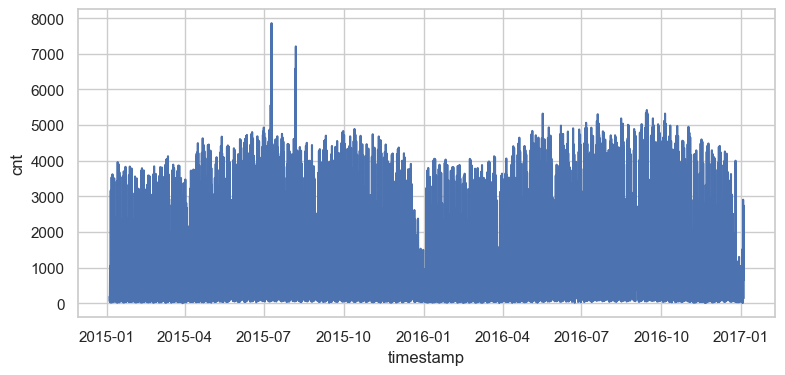

In [53]:
sns.lineplot(x=df['timestamp'], y=df['cnt'])

### 3

Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут.

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

· Максимальное число аренд за день – более 1 000 000  
· Встречаются только резкие скачки вверх  
__· Зимой число аренд меньше, чем летом__    
· Число аренд зимой и летом никак не различается  
· Максимальное число аренд за день не превышало 8 000  
__· Максимальное число аренд за день составляет более 70 000__    
__· Встречаются как очень резкие скачки числа аренд, так и падения__  

In [23]:
df.sort_values(by='timestamp', inplace=True)
df.set_index('timestamp', drop=False, inplace=True)
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


**СМОТРИМ ВЫБРОСЫ**

In [43]:
df['cnt'].index#.resample('D').sum()

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [62]:
df['cnt'].resample('D').sum()

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

<Axes: xlabel='timestamp'>

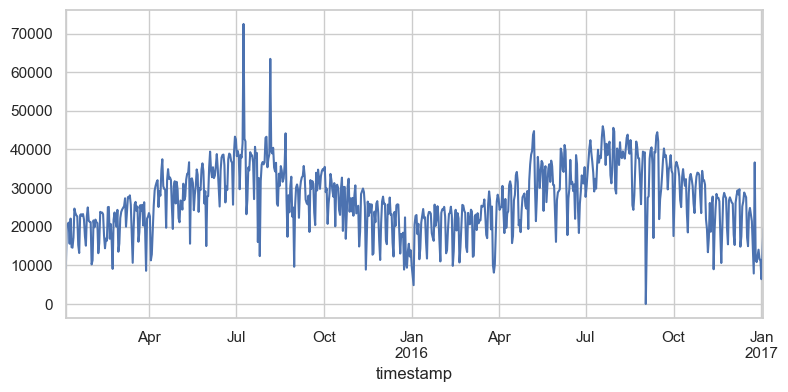

In [54]:
df['cnt'].resample('D').sum().plot()

### 4

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

· сначала посчитаем скользящее среднее, чтобы сгладить ряд  
· далее – разницу между наблюдаемыми и сглаженными значениями  
· определим верхние и нижние границы 99% доверительного интервала   
· найдем причины аномалий!  
На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3 дня.

In [77]:
df_by_day_roll = df["cnt"].resample('D').sum().rolling(window=3).mean()
df_by_day_roll=df_by_day_roll.reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


**Выбросы в точках сильно больше скользящего среднего**

<Axes: xlabel='timestamp'>

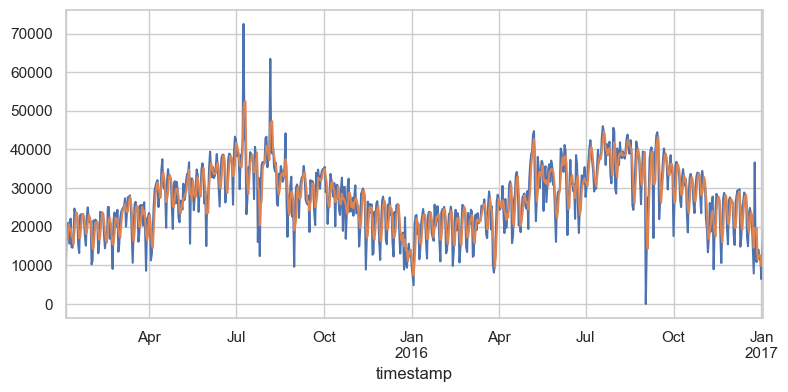

In [61]:
df['cnt'].resample('D').sum().plot()
df_by_day_roll.plot()

### 5

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b  
std = np.std(c)

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [88]:
std=np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])
round(np.std(df_by_day['cnt'] - df_by_day_roll['cnt']), 2)

4558.59

In [87]:
d=((df_by_day['cnt'] - df_by_day_roll['cnt'])**2).sum()
np.sqrt(d/len(df_by_day['cnt'])-1)

4552.346175120079

### 6

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

· upper_bound – верхняя граница; к средним прибавляем 2.576∗std  
· lower_bound – нижняя граница; вычитаем 2.576∗std  
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.  

Чему равно значение **верхней** границы для **последнего** наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [89]:
upper_bound = df_by_day_roll['cnt'] + 2.576 * std # +3 сигмы
lower_bound = df_by_day_roll['cnt'] - 2.576 * std # -3 сигмы

In [91]:
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound

In [92]:
df_by_day

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,11566,24424.919188,939.080812
727,2016-12-31,11424,24090.252521,604.414146
728,2017-01-01,6421,21546.585854,-1939.252521
729,2017-01-02,11823,21632.252521,-1853.585854


In [90]:
round(upper_bound.loc[730], 2)

24302.92

### 7

И наконец – **изучим аномально высокие значения!** Сначала выведите наблюдения, для которых наблюдаемые значения( количество аренд в час-cnt) оказались больше верхней границы 99% доверительного интервала.

In [97]:
df_by_day.query('cnt > upper_bound')

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


### 8

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

In [98]:
df_by_day.query('cnt < lower_bound') # 2016-09-02- Скорее всего ощибка в данных

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812
